**<font size="6">Bankruptcy Prediction using MLflow**

**<font size = 4> Importing packages**

In [292]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import io
import requests
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
pd.options.mode.chained_assignment = None  # default='warn'

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**<font size = 4>Importing Dataset and Initial Dataframe Preprocessing**

In [293]:
# Import data

url = "https://raw.githubusercontent.com/julesz12345/MLflow_BankruptcyPrediction/main/Data.csv"
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [294]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [296]:
# Some more information about the dataset

display(df.shape)
display(df.isnull().sum())
display(df.describe())

(6819, 96)

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

<font size="4">No missing values and no categorical variables in the dataset.

In [297]:
# Cheking for unique values

display(df[' Liability-Assets Flag'].nunique())
display(df[' Net Income Flag'].nunique())

2

1

In [298]:
# Dropping "Net Income Flag" column since it does not bring any value to our model

df = df.drop([' Net Income Flag'], axis=1)

Text(0, 0.5, 'Number of companies')

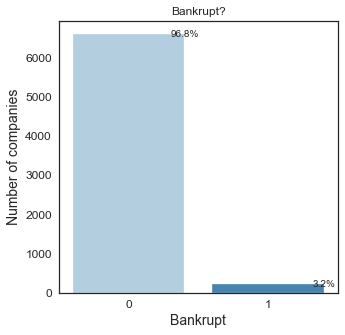

In [299]:
# We are checking for imbalanced data

import seaborn as sns

plt.figure(figsize=(5,5))
splot = sns.countplot(data = df,x = 'Bankrupt?',palette = 'Blues')
sns.set_style('ticks')
total = float(len(df))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage, (x,y), ha = 'center', va = 'center')
plt.title("Bankrupt?")
plt.xlabel("Bankrupt")
plt.ylabel("Number of companies")

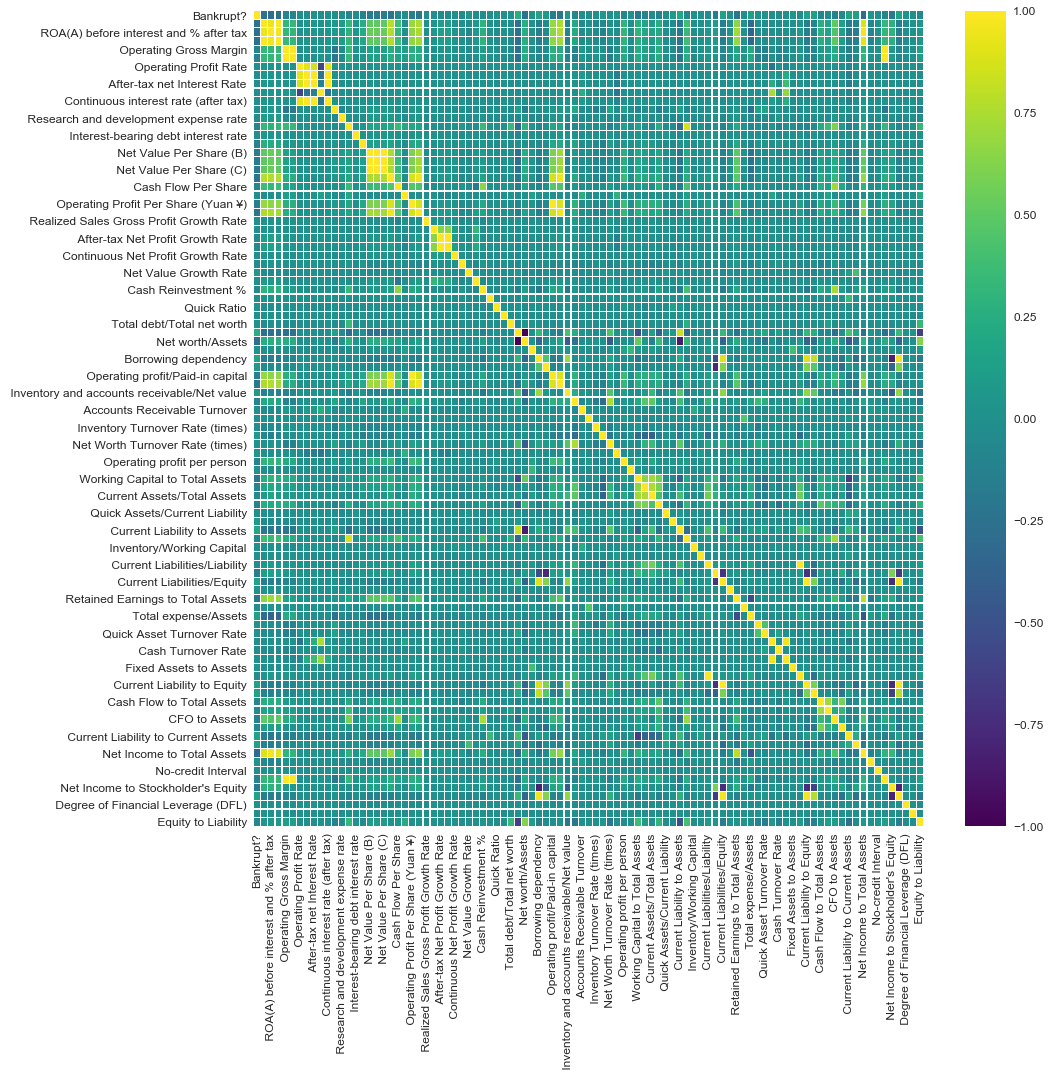

In [300]:
# Correlation

corr = df.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, ax = ax, cmap = 'viridis', linewidth = 0.1)

**<font size=4> Preparing Data for ML models**

In [301]:
# Variable creation

X = df.drop(['Bankrupt?'], axis=1)
y = df['Bankrupt?']

In [302]:
# Creating training and testing variables

from sklearn.model_selection import train_test_split

X_train, X_test_final, y_train, y_test_final = train_test_split(X,y, test_size=0.2, random_state=42)

In [303]:
X_train.shape

(5455, 94)

In [304]:
#Scaling the data to normalize the different predictors

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

num_attribs = list(X_train)

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs)])

In [305]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)
X_test_final_prepared = full_pipeline.transform(X_test_final)

In [306]:
X_train_prepared = pd.DataFrame(X_train_prepared, columns=num_attribs)
X_test_prepared = pd.DataFrame(X_test_prepared, columns=num_attribs)
X_test_final_prepared = pd.DataFrame(X_test_final_prepared, columns=num_attribs)

In [307]:
display(X_train.shape)
display(y_train.shape)

(5455, 94)

(5455,)

In [308]:
count = 0
for i in y_train:
    if i == 1:
        count +=1
print("There are",count,"cases of bankruptcy and",len(y_train)-count,"of non-bankruptcy")

There are 169 cases of bankruptcy and 5286 of non-bankruptcy


In [309]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [310]:
y_train.reset_index(inplace=True)
y_train.drop(columns='index',axis=1,inplace=True)
y_test.reset_index(inplace=True)
y_test.drop(columns='index',inplace=True)

**<font size=4> Base Model**

In [311]:
# Find some classification models and check their baseline accuracy with 10 CV folds

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve



def get_model():
    models = []
    models.append(('LR' , LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('GBC', GradientBoostingClassifier()))
    models.append(('RF' , RandomForestClassifier(n_estimators=100)))
    models.append(('MLP', MLPClassifier()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('ADABoost' , AdaBoostClassifier()))
    models.append(('XGB' , xgb.XGBClassifier(use_label_encoder=False)))
    models.append(('LightGBM' , lgb.LGBMClassifier()))
    return models

def bl_performance(X_train, y_train,models):
    plt.figure(figsize=(20,8))
    plt.title('ROC Curve', fontsize=14)
    results = []
    names = []
    acc = []
    f1 = []
    recall = []
    precision = []
    for name, model in models:
        kfold = KFold(n_splits=5)
        cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=['accuracy','f1','recall','precision'])
        print(cv_results)
        results.append(cv_results)
        names.append(name)
        print('{}: CV accuracy mean: {:.4}'.format(name, cv_results['test_accuracy'].mean()))
        print('{}: CV F1 score mean: {:.4}'.format(name, cv_results['test_f1'].mean()))
        print('{}: CV Recall score mean: {:.4}'.format(name, cv_results['test_recall'].mean()))
        print('{}: CV Precision score mean: {:.4}'.format(name, cv_results['test_precision'].mean()))
        acc += [cv_results['test_accuracy'].mean()]
        f1 += [cv_results['test_f1'].mean()]
        recall += [cv_results['test_recall'].mean()]
        precision += [cv_results['test_precision'].mean()]
        
        model.fit(X_train_prepared,y_train)
        y_pred = model.predict(X_test_prepared)
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        
        
        plt.plot(fpr, tpr, label='{} Classifier Score: {:.4f}'.format(name,roc_auc_score(y_test, y_pred)))
        
        
        
    result_df = pd.DataFrame()
    result_df['Model'] = ['LR','KNN','SVM','GBC','RF','MLP','LDA','ADABoost','XGB','LightGBM']
    result_df['Accuracy'] = acc
    result_df['F1'] = f1
    result_df['Recall'] = recall
    result_df['Precision'] = precision
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
        
    return names, results, result_df

{'fit_time': array([0.11179066, 0.06899405, 0.11587453, 0.07810569, 0.09154725]), 'score_time': array([0.       , 0.       , 0.       , 0.0065589, 0.       ]), 'test_accuracy': array([0.96333639, 0.97525206, 0.97250229, 0.9624198 , 0.9624198 ]), 'test_f1': array([0.23076923, 0.27027027, 0.42307692, 0.22641509, 0.16326531]), 'test_recall': array([0.17647059, 0.18518519, 0.35483871, 0.15      , 0.10810811]), 'test_precision': array([0.33333333, 0.5       , 0.52380952, 0.46153846, 0.33333333])}
LR: CV accuracy mean: 0.9672
LR: CV F1 score mean: 0.2628
LR: CV Recall score mean: 0.1949
LR: CV Precision score mean: 0.4304
{'fit_time': array([0.0080564 , 0.0080719 , 0.00515747, 0.01009345, 0.01008487]), 'score_time': array([0.28394246, 0.14178181, 0.18639231, 0.16149712, 0.17220473]), 'test_accuracy': array([0.96608616, 0.9715857 , 0.97250229, 0.96516957, 0.96791934]), 'test_f1': array([0.21276596, 0.11428571, 0.16666667, 0.26923077, 0.28571429]), 'test_recall': array([0.14705882, 0.07407407,

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Jules\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



{'fit_time': array([0.18094254, 0.19169402, 0.18260765, 0.19046998, 0.17670488]), 'score_time': array([0.08363342, 0.08338118, 0.08180308, 0.09166694, 0.09067488]), 'test_accuracy': array([0.96700275, 0.97525206, 0.9715857 , 0.96333639, 0.96608616]), 'test_f1': array([0., 0., 0., 0., 0.]), 'test_recall': array([0., 0., 0., 0., 0.]), 'test_precision': array([0., 0., 0., 0., 0.])}
SVM: CV accuracy mean: 0.9687
SVM: CV F1 score mean: 0.0
SVM: CV Recall score mean: 0.0
SVM: CV Precision score mean: 0.0
{'fit_time': array([10.11468577,  8.34121346, 10.38954139,  9.59200215, 10.36111236]), 'score_time': array([0.00900412, 0.        , 0.00997257, 0.01563096, 0.00650644]), 'test_accuracy': array([0.96150321, 0.97341888, 0.97250229, 0.96425298, 0.96791934]), 'test_f1': array([0.25      , 0.35555556, 0.34782609, 0.36065574, 0.28571429]), 'test_recall': array([0.20588235, 0.2962963 , 0.25806452, 0.275     , 0.18918919]), 'test_precision': array([0.31818182, 0.44444444, 0.53333333, 0.52380952, 0.5

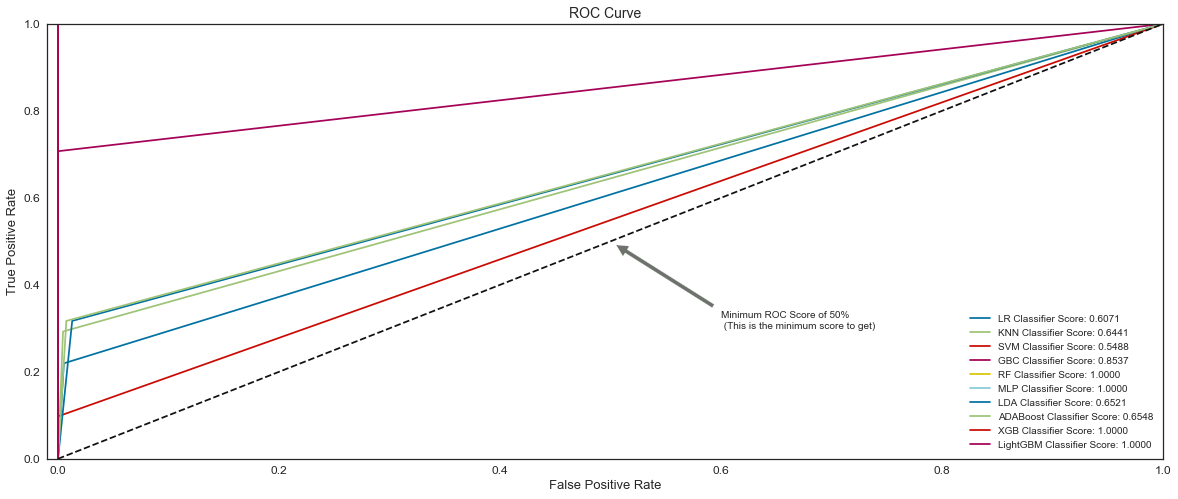

In [312]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = get_model()
names,results,result_df= bl_performance(X_train_prepared, y_train.values.ravel(),models)

result_df.sort_values(by='F1',ascending=False,inplace=True)

In [313]:
result_df

,Model,Accuracy,F1,Recall,Precision
6,LDA,0.962053,0.348866,0.333896,0.371993
3,GBC,0.967919,0.319950,0.244886,0.480620
9,LightGBM,0.971402,0.310057,0.207187,0.635556
5,MLP,0.964803,0.302178,0.246428,0.400256
8,XGB,0.969753,0.302152,0.213857,0.540000
7,ADABoost,0.966086,0.279960,0.218193,0.408132
0,LR,0.967186,0.262759,0.194921,0.430403
4,RF,0.970852,0.215568,0.132753,0.638889
1,KNN,0.968653,0.209733,0.136419,0.480256
2,SVM,0.968653,0.000000,0.000000,0.000000


In [314]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

<font size=4> Looking at the F1 scores of the different models, we find that the one that performs the best without any improvements to our dataset is Linear Discriminant Analysis (LDA) with a score of **34.7.** We will therefore try to get a higher score than that by changing different parameters in our models as well as trying to be more efficient with the predictors that we use.  

## Feature Selection, resampling and data transformation

In [315]:
#Anomaly Detection and dropping outliers

from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators=100,contamination=0.01)
pred = iforest.fit_predict(X_train_prepared)
score = iforest.decision_function(X_train_prepared)
from numpy import where
anom_index = where(pred==-1)
values = X.iloc[anom_index]

for i in values.index:
    X_train_prepared = X_train_prepared.drop(i)
    y_train = y_train.drop(i)

In [316]:
ctr = len(values)
print("Number of observations dropped = {}".format(ctr))

Number of observations dropped = 55


In [317]:
# Modelling with balanced target variable

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_prepared, y_train.values.ravel())

sel = SelectFromModel(model)
sel.fit(X_test_prepared, y_test.values.ravel())

selected_feat= X_train.columns[(sel.get_support())]

In [318]:
!pip install imblearn

In [319]:
# Dealing with imbalanced data by oversampling

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy = 0.2)
under = RandomUnderSampler(sampling_strategy = 0.6)

steps = [('o',over),('u',under)]
pipeline = Pipeline(steps = steps)

over_sample=SMOTE()
X_train_prepared, y_train=over_sample.fit_resample(X_train_prepared,y_train)

In [320]:
display(X_train_prepared.shape)
display(y_train.shape)

(10492, 94)

(10492, 1)

Text(0, 0.5, 'Number of companies')

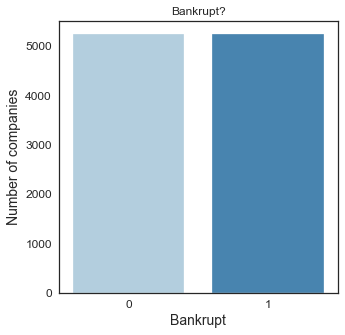

In [321]:
plt.figure(figsize=(5,5))
splot = sns.countplot(data = y_train, x = 'Bankrupt?', palette = 'Blues')
sns.set_style('ticks')
total = float(len(df))
plt.title("Bankrupt?")
plt.xlabel("Bankrupt")
plt.ylabel("Number of companies")

### Dropping highly correlated columns (greater than 0.85)

In [322]:
!pip install rfpimp

In [323]:
import rfpimp
limit = 0.85
corr = X_train_prepared.corr()

In [324]:
mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
corr_no_diag = corr.where(mask)

In [325]:
corr_no_diag

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
ROA(C) before interest and depreciation before interest,NaN,0.944046,0.980149,0.395524,0.392307,0.027287,0.058839,0.053632,0.051494,0.056991,0.103464,0.036225,0.398098,0.056978,0.391227,0.595520,0.593885,0.592580,0.850729,0.437636,0.003766,0.766602,0.838581,0.007625,0.037827,0.102471,0.103594,0.029083,0.159341,-0.005121,0.102180,0.372812,0.014513,-0.051961,0.035848,-0.018547,-0.339757,0.339757,0.018580,-0.271337,-0.096516,0.766147,0.851993,-0.134685,0.223962,-0.007156,0.015829,-0.005237,-0.052248,0.051076,0.042186,0.410285,0.007529,0.315584,0.146897,0.081100,0.231815,-0.001072,-0.057597,-0.322084,0.415274,-0.015775,0.042866,-0.032102,0.225541,-0.308652,0.003116,0.760174,0.029077,-0.564131,0.025963,-0.058455,0.003749,0.069609,0.007361,0.017768,-0.032102,-0.308652,-0.064851,0.288592,0.183653,0.543386,0.285412,-0.212908,-0.005121,0.889896,-0.172326,0.030578,0.395527,0.814061,-0.285941,0.009132,0.044243,1.387899e-01
ROA(A) before interest and % after tax,NaN,NaN,0.975112,0.371650,0.368818,0.024187,0.055900,0.051605,0.053201,0.053787,0.115041,-0.002229,0.347081,0.040334,0.358164,0.597109,0.595716,0.595119,0.812591,0.365289,0.007113,0.716414,0.802313,0.009335,0.031091,0.094899,0.096543,0.024424,0.182580,-0.008153,0.100968,0.292450,0.013862,-0.037924,0.031367,-0.006328,-0.292739,0.292739,0.024270,-0.225522,-0.060498,0.715667,0.815933,-0.071874,

In [326]:
coll = [c for c in corr_no_diag.columns if any(abs(corr_no_diag[c]) > limit)]

In [327]:
# Highly corelated columns

coll

[' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Realized Sales Gross Margin',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Continuous interest rate (after tax)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Regular Net Profit Growth Rate',
 ' Net worth/Assets',
 ' Operating profit/Paid-in capital',
 ' Net profit before tax/Paid-in capital',
 ' Operating Funds to Liability',
 ' Current Liabilities/Equity',
 ' Retained Earnings to Total Assets',
 ' Cash Flow to Sales',
 ' Current Liability to Liability',
 ' Current Liability to Equity',
 ' CFO to Assets',
 ' Cash Flow to Equity',
 ' Liability-Assets Flag',
 ' Net Income to Total Assets',
 ' Gross Profit to Sales',
 " Net Income to Stockholder's Equity",
 ' Liability to Equity']

### Variance threshold

In [328]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

sel.fit(X_train_prepared)
var = sel.get_support()

col2 = []
for i in range(94):
    if not var[i]:
        col2.append(num_attribs[i])

In [329]:
col2

[' Revenue Per Share (Yuan ¥)',
 ' Contingent liabilities/Net worth',
 ' Revenue per person',
 ' Liability-Assets Flag',
 " Net Income to Stockholder's Equity"]

In [330]:
# Highly corelated columns with variance > 0.16
col_del = coll.copy()
for i in col2:
    if i not in coll:
        col_del.append(i)
col_del

[' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Realized Sales Gross Margin',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Continuous interest rate (after tax)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Regular Net Profit Growth Rate',
 ' Net worth/Assets',
 ' Operating profit/Paid-in capital',
 ' Net profit before tax/Paid-in capital',
 ' Operating Funds to Liability',
 ' Current Liabilities/Equity',
 ' Retained Earnings to Total Assets',
 ' Cash Flow to Sales',
 ' Current Liability to Liability',
 ' Current Liability to Equity',
 ' CFO to Assets',
 ' Cash Flow to Equity',
 ' Liability-Assets Flag',
 ' Net Income to Total Assets',
 ' Gross Profit to Sales',
 " Net Income to Stockholder's Equity",
 ' Liability to Equity',
 ' Revenue Per Share (Yuan ¥)',
 ' Conti

In [331]:
len(col_del)

31

In [332]:
# 32 columns removed

X_train_prepared_old = X_train_prepared.copy()
X_train_prepared.drop(columns=col_del,axis=1,inplace=True)

In [333]:
X_train_prepared.shape

(10492, 63)

**<font size=4> Trying out different feature selection techniques**

<font size=4>Tree-Based Feature Selection

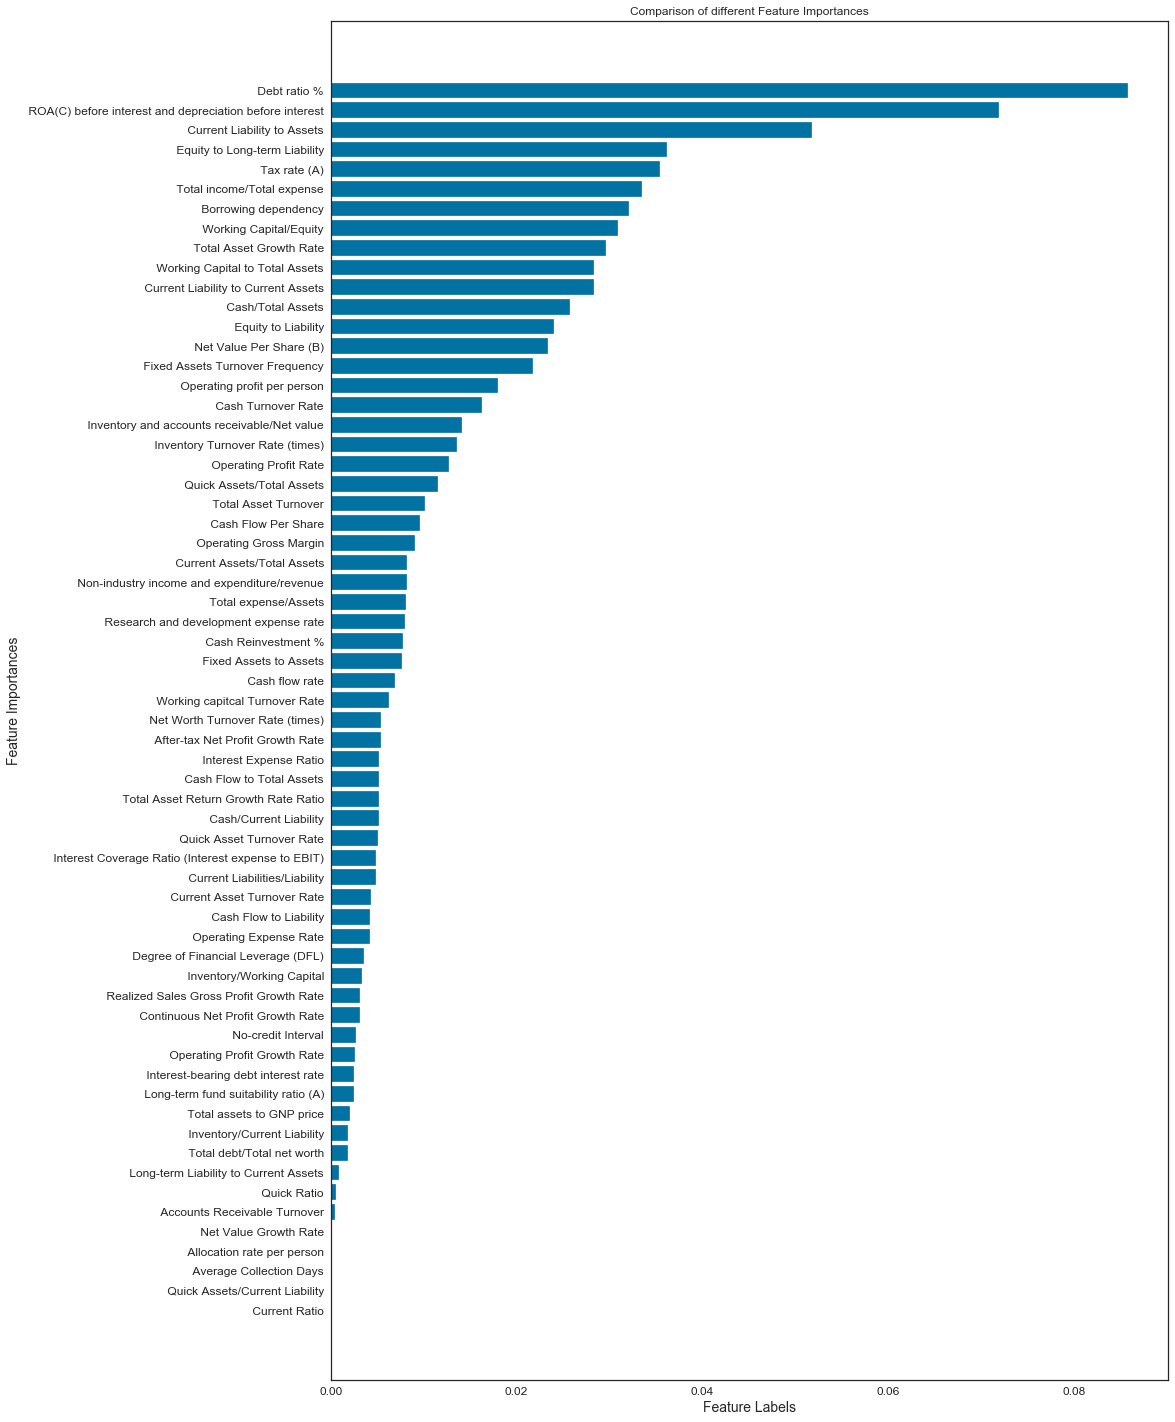

In [334]:
# Feature selection (tree-based)

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

clf = ExtraTreesClassifier(n_estimators=50, random_state=45)
clf = clf.fit(X_train_prepared, y_train.values.ravel())
feature_importance = clf.feature_importances_
  
# Normalizing the individual importances 

feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        clf.estimators_], 
                                        axis = 0) 

tbfs = pd.DataFrame(
    {"X": X_train_prepared.columns, "FI": feature_importance_normalized}
)

tbfs = tbfs.sort_values('FI',ascending=True)


# Plotting a Bar Graph to compare the models 

plt.figure(figsize=(15,25))
plt.barh(y=tbfs['X'],width=tbfs['FI']) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()


In [335]:
!pip install yellowbrick

In [336]:
from sklearn.feature_selection import RFE
from sklearn import ensemble
from yellowbrick.features import RFECV

# RFE

rf = RandomForestClassifier(random_state=42)
model = RFE(rf, n_features_to_select=50)
fit_model = model.fit(X_train_prepared, y_train.values.ravel())
features = pd.DataFrame(list(zip(X_train_prepared.columns,fit_model.ranking_)), columns = ['predictor','ranking'])

In [337]:
features = features.sort_values(by = 'ranking')

In [338]:
# RFE and Tree based feature importance signify that features with rank greater than 3 in RFE are insignificant

chosen_features = features[features['ranking']<3]

In [339]:
chosen_features.shape

(51, 2)

In [340]:
chosen_features

,predictor,ranking
0,ROA(C) before interest and depreciation befor...,1
61,Interest Coverage Ratio (Interest expense to ...,1
32,Net Worth Turnover Rate (times),1
33,Operating profit per person,1
35,Working Capital to Total Assets,1
36,Quick Assets/Total Assets,1
37,Current Assets/Total Assets,1
38,Cash/Total Assets,1
41,Current Liability to Assets,1
42,Inventory/Working Capital,1


In [341]:
# Training and test set with selected features

X_train_prepared = X_train_prepared[chosen_features['predictor']]
X_test_prepared = X_test_prepared[chosen_features['predictor']]
X_test_final_prepared = X_test_final_prepared[chosen_features['predictor']]

{'fit_time': array([0.27882028, 0.26924658, 0.27218628, 0.32046127, 0.24569535]), 'score_time': array([0.01396251, 0.01212621, 0.02013636, 0.01488638, 0.01003861]), 'test_accuracy': array([0.84754645, 0.84849929, 0.90228789, 0.86034318, 0.86606292]), 'test_f1': array([0.24170616, 0.25      , 0.89503328, 0.92492954, 0.92822478]), 'test_recall': array([0.96226415, 0.86885246, 0.93376068, 0.86034318, 0.86606292]), 'test_precision': array([0.13821138, 0.14600551, 0.85939036, 1.        , 1.        ])}
LR: CV accuracy mean: 0.8649
LR: CV F1 score mean: 0.648
LR: CV Recall score mean: 0.8983
LR: CV Precision score mean: 0.6287
{'fit_time': array([0.00803757, 0.0100441 , 0.01562738, 0.0020237 , 0.01003003]), 'score_time': array([0.68614554, 0.68522429, 0.68258929, 0.70689726, 0.64321184]), 'test_accuracy': array([0.85516913, 0.86565031, 0.93517636, 0.99952336, 1.        ]), 'test_f1': array([0.25853659, 0.3019802 , 0.93227092, 0.99976162, 1.        ]), 'test_recall': array([1.        , 1.     

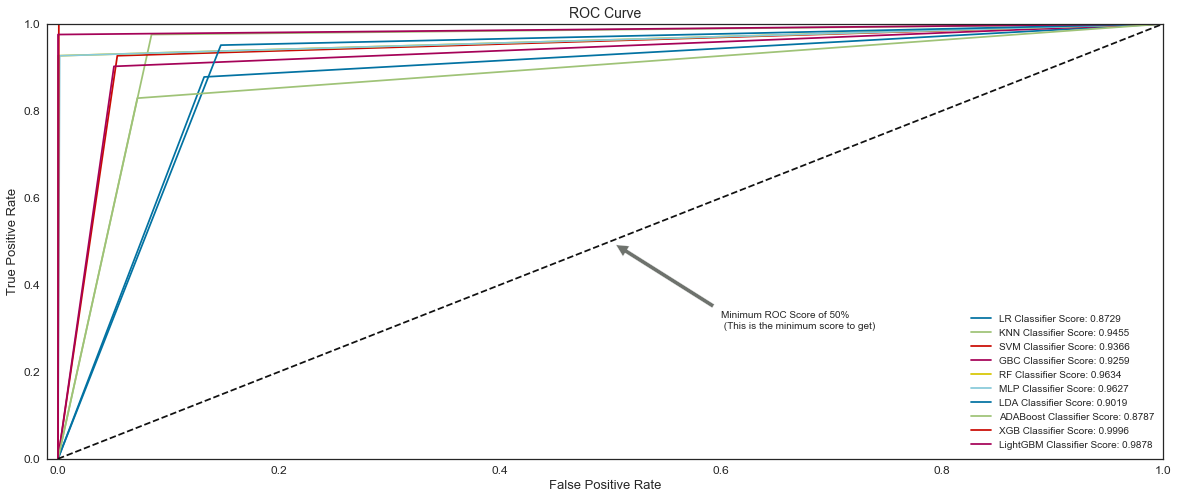

In [342]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = get_model()
names,results,result_df= bl_performance(X_train_prepared, y_train.values.ravel(),models)

result_df.sort_values(by='F1',ascending=False,inplace=True)

In [343]:
result_df

,Model,Accuracy,F1,Recall,Precision
5,MLP,0.986754,0.866447,1.000000,0.797450
8,XGB,0.981799,0.832659,0.991735,0.763264
9,LightGBM,0.981037,0.829195,0.987861,0.760767
4,RF,0.976462,0.820939,0.991059,0.753120
2,SVM,0.955400,0.754722,0.988130,0.690372
3,GBC,0.950826,0.741181,0.958695,0.685310
7,ADABoost,0.924899,0.700676,0.884310,0.663059
1,KNN,0.931104,0.698510,0.999905,0.639887
0,LR,0.864948,0.647979,0.898257,0.628721
6,LDA,0.849225,0.633725,0.907284,0.616786


In [344]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

<fon size=4> PCA

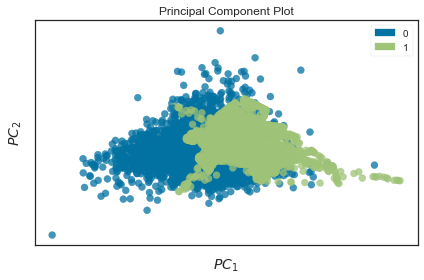

In [345]:
from yellowbrick.features.pca import PCADecomposition
fig, ax = plt.subplots(figsize=(6, 4))
colors = ["rg"[j] for j in y_train['Bankrupt?']]
pca_viz = PCADecomposition(color=colors)
pca_viz.fit_transform(X_train_prepared, y_train['Bankrupt?'])
pca_viz.poof()

In [346]:
# Dimension Reduction using PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_train_prepared_PCA = pca.fit_transform(X_train_prepared)

{'fit_time': array([0.02592635, 0.02365756, 0.02313805, 0.03124952, 0.03124237]), 'score_time': array([0.006984  , 0.01562142, 0.        , 0.        , 0.        ]), 'test_accuracy': array([0.79466413, 0.80514531, 0.85653003, 0.80886559, 0.82793136]), 'test_f1': array([0.17904762, 0.20272904, 0.8449253 , 0.89433465, 0.90586701]), 'test_recall': array([0.88679245, 0.85245902, 0.87606838, 0.80886559, 0.82793136]), 'test_precision': array([0.09957627, 0.11504425, 0.8159204 , 1.        , 1.        ])}
LR: CV accuracy mean: 0.8186
LR: CV F1 score mean: 0.6054
LR: CV Recall score mean: 0.8504
LR: CV Precision score mean: 0.6061
{'fit_time': array([0.08857727, 0.06251264, 0.04951262, 0.06249285, 0.04998636]), 'score_time': array([0.88451099, 0.80257964, 0.60535002, 0.34355354, 0.34529257]), 'test_accuracy': array([0.85802763, 0.86326822, 0.93469971, 0.99714013, 0.99618684]), 'test_f1': array([0.26237624, 0.29828851, 0.93173891, 0.99856802, 0.99808978]), 'test_recall': array([1.        , 1.    

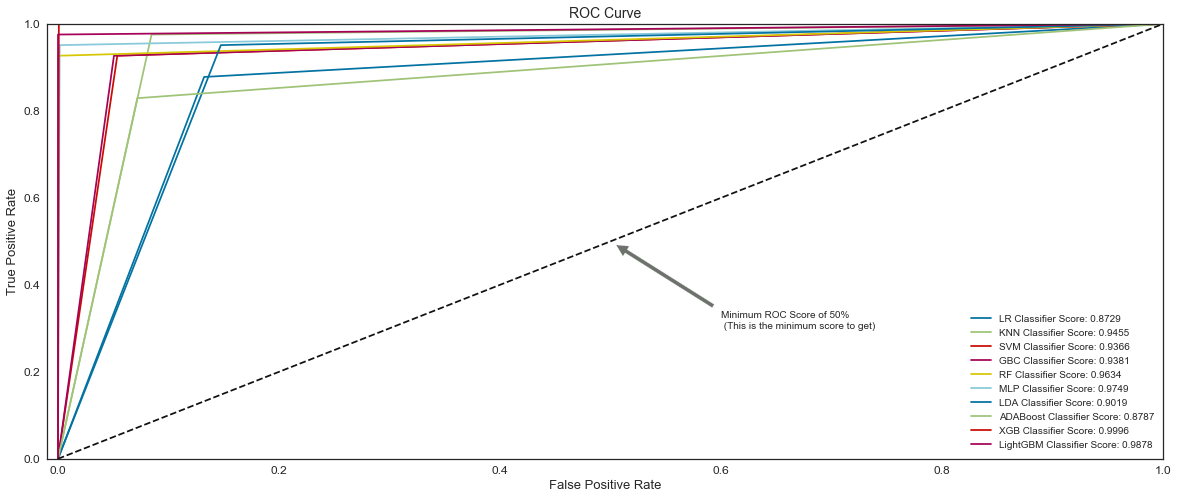

In [347]:
models = get_model()
names,results,result_df= bl_performance(X_train_prepared_PCA, y_train.values.ravel(),models)

result_df.sort_values(by='F1',ascending=False,inplace=True)

import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

In [348]:
result_df

,Model,Accuracy,F1,Recall,Precision
5,MLP,0.975986,0.808248,0.991018,0.738730
4,RF,0.963404,0.792298,0.982626,0.728954
8,XGB,0.966551,0.783132,0.990505,0.716563
9,LightGBM,0.960165,0.767179,0.988934,0.701978
2,SVM,0.928047,0.709596,0.967886,0.658468
1,KNN,0.929865,0.697812,0.998452,0.639860
3,GBC,0.901073,0.682708,0.934078,0.648404
7,ADABoost,0.851509,0.632671,0.870150,0.620629
0,LR,0.818627,0.605381,0.850423,0.606108
6,LDA,0.811386,0.601941,0.865271,0.600023


In [349]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

<font size=4>t-SNE

Text(0, 0.5, 'Embedding 2')

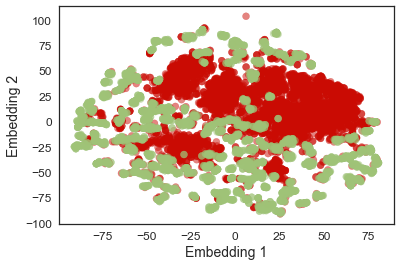

In [350]:
from sklearn.manifold import TSNE
ts = TSNE()
X_tsne = ts.fit_transform(X_train_prepared)
fig, ax = plt.subplots(figsize=(6, 4))
colors = ["rg"[j] for j in y_train['Bankrupt?']]
scat = ax.scatter(
 X_tsne[:, 0],
 X_tsne[:, 1],
 c=colors,
 alpha=0.5,
)
ax.set_xlabel("Embedding 1")
ax.set_ylabel("Embedding 2")

In [351]:
ts = TSNE(n_components=3)
X_tsne = ts.fit_transform(X_train_prepared)

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = get_model()
names,results,result_df= bl_performance(X_tsne, y_train.values.ravel(),models)

{'fit_time': array([0.02492189, 0.03015494, 0.02012444, 0.02013373, 0.02011919]), 'score_time': array([0.01007056, 0.        , 0.        , 0.        , 0.        ]), 'test_accuracy': array([0.69747499, 0.71272034, 0.82173499, 0.6920877 , 0.71401335]), 'test_f1': array([0.13605442, 0.1323741 , 0.80253432, 0.81802817, 0.83314794]), 'test_recall': array([0.94339623, 0.75409836, 0.81196581, 0.6920877 , 0.71401335]), 'test_precision': array([0.07331378, 0.07255521, 0.79331942, 1.        , 1.        ])}
LR: CV accuracy mean: 0.7276
LR: CV F1 score mean: 0.5444
LR: CV Recall score mean: 0.7831
LR: CV Precision score mean: 0.5878
{'fit_time': array([0.01009631, 0.01108694, 0.01009345, 0.0080452 , 0.0080421 ]), 'score_time': array([0.11870623, 0.0806613 , 0.06055164, 0.05250454, 0.05290389]), 'test_accuracy': array([0.89423535, 0.8956646 , 0.94280267, 0.99046711, 0.98760724]), 'test_f1': array([0.32317073, 0.35777126, 0.93951613, 0.99521073, 0.99376499]), 'test_recall': array([1.        , 1.    

In [ ]:
result_df.sort_values(by='F1',ascending=False,inplace=True)
result_df

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

<font size=4>PHATE

In [ ]:
!pip install phate

In [ ]:
import phate
p = phate.PHATE(random_state=42)
X_phate = p.fit_transform(X_train_prepared)
X_phate.shape
fig, ax = plt.subplots(figsize=(6, 4))
phate.plot.scatter2d(p, c=y_train['Bankrupt?'], ax=ax, alpha=0.5)

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = get_model()
names,results,result_df= bl_performance(X_phate, y_train.values.ravel(),models)

In [ ]:
result_df.sort_values(by='F1',ascending=False,inplace=True)
result_df

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

<font size=4> After trying out different dimensionality reduction techniques in Tree Based, PCA, t-SNE and Phate, we found that using the Tree Based method with LightGBM was the best way to increase the overall F1 score of our models without changing any hyperparameters. We will therefore be trying to improve that F1 score even more by tunning those parameters through the use of MLflow.

## MLflow

In [ ]:
!pip install mlflow

In [ ]:
!pip install hyperopt

In [ ]:
import mlflow
import mlflow.pyfunc
import mlflow.sklearn
from sklearn.model_selection import cross_val_score
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll import scope
from IPython.display import Image
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier

In [ ]:
hyperparameters = {"max_depth":scope.int(hp.quniform("max_depth",2,100,5)),
                "n_estimators":scope.int(hp.quniform("n_estimators",2,100,1)),
                "num_leaves": scope.int(hp.quniform("num_leaves",2,50,1)),
                "reg_alpha": hp.loguniform('reg_li',-5,5),
                "random_state":1,
                "learning_rate": hp.loguniform("learning_rate", np.log(0.01), np.log(0.5)),
                "min_child_weight": hp.uniform('min_child_weight', 0.5, 10),
                "boosting": hp.choice("boosting",["gbdt","dart","goss"]),
                "objective":"binary"}

In [ ]:
def train_model(parameters):
    mlflow.lightgbm.autolog()
    with mlflow.start_run(nested=True):
        booster = lgb.LGBMClassifier()
        booster.set_params(**parameters)
        booster.fit(X_train_prepared,y_train.values.ravel())
        
        mlflow.log_params(parameters)
        
        score = cross_val_score(booster, X_train_prepared, y_train.values.ravel(), cv=5, scoring = "f1_macro",n_jobs=-1)
        mean_score = np.mean(score)
        
        mlflow.log_metric('f1_macro', mean_score)
        
        return{'status':STATUS_OK,
               "loss":mean_score,
               'booster':booster.get_params}
    
with mlflow.start_run(run_name='lightgbm_bankruptcy'):
    best_params = fmin(
        fn=train_model,
        space=hyperparameters,
        algo=tpe.suggest,
        max_evals = 50,
        trials = Trials(),
        rstate=np.random.RandomState(1))

**<font size=4>Final Optimal Model**

In [ ]:
import mlflow
df = mlflow.search_runs(filter_string="metric.f1_macro > 0.8")

In [ ]:
df

In [ ]:
df.sort_values(by='metrics.f1_macro').iloc[0]

In [ ]:
# Getting optimal parameters

params = df.sort_values(by='metrics.f1_macro').iloc[0,7:16].to_dict()
params

In [ ]:
X_test_prepared = X_test_final[chosen_features['predictor']]
X_test_prepared = X_test_prepared[chosen_features['predictor']]
X_test_final_prepared = X_test_final_prepared[chosen_features['predictor']]

In [ ]:
import lightgbm

In [ ]:
train_data = lightgbm.Dataset(X_train_prepared, label=y_train)
valid_data = lightgbm.Dataset(X_test_prepared, label=y_test)
test_data = lightgbm.Dataset(X_test_final_prepared, label=y_test_final)

In [ ]:
X_train_prepared.shape

In [ ]:
parameters = {
    'objective': params["params.objective"],
    'boosting': params["params.boosting"],
    'num_leaves': int(params["params.num_leaves"]),
    'learning_rate': float(params["params.learning_rate"]),
    'min_child_weight': float(params["params.min_child_weight"]),
    'random_state': 1,
    'reg_alpha':float(params["params.reg_alpha"]),
    'max_depth': int(params["params.max_depth"])
}

In [ ]:
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=valid_data)

In [ ]:
y_pred = model.predict(X_test_final_prepared)
y_pred=y_pred.round(0)
y_pred=y_pred.astype(int)

In [ ]:
# Final F1 score

from sklearn.metrics import f1_score
f1_score(y_test_final, y_pred, average='weighted')

<font size=4> After preprocessing the data, choosing specific predictors and optimizing our model's paramaters, we ended up with an F1 score of **90%** in predicting whether a company would go bankrupt or not. This is a 55.3% improvement from the original base model that we built earlier with the original score being 34.7%.